In [1]:
# In this notebook, we explore the German Credit Default dataset data.
# The intention is to use Gender as the Protected Variable.

In [2]:
# Import Data handling/display libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
German = './input/german.data'
feature_names = ['CurrentAcc', 'NumMonths', 'CreditHistory', 'Purpose', 'CreditAmount', 
         'Savings', 'EmployDuration', 'PayBackPercent', 'Gender', 'Debtors', 
         'ResidenceDuration', 'Collateral', 'Age', 'OtherPayBackPlan', 'Property', 
         'ExistingCredit', 'Job', 'Dependents', 'Telephone', 'ForeignWorker', 'CreditStatus']
German_df = pd.read_csv(German,names = feature_names, delimiter=' ')

In [4]:
# How many (rows, columns)
German_df.shape

(1000, 21)

In [5]:
# Encode CreditStatus from GoodCreditStatus=1 and BadCreditStatus=2 ==> GoodCreditStatus=1 and BadCreditStatus=0 
# to comply with the AIF360 convention for favourable/unfavavourable labels. 
print('Before CreditStatus transform:')
print(German_df.CreditStatus.value_counts())
Status = {1: 1,2: 0} 
German_df.CreditStatus = [Status[item] for item in German_df.CreditStatus]
print('After CreditStatus transform:')
print(German_df.CreditStatus.value_counts())

Before CreditStatus transform:
1    700
2    300
Name: CreditStatus, dtype: int64
After CreditStatus transform:
1    700
0    300
Name: CreditStatus, dtype: int64


In [6]:
German_df.loc[German_df.Gender=='A91', 'MaritalStatus'] = 'Man Was Married' 
German_df.loc[German_df.Gender=='A92', 'MaritalStatus'] = 'Women With Man' 
German_df.loc[German_df.Gender=='A93', 'MaritalStatus'] = 'Single Male' 
German_df.loc[German_df.Gender=='A94', 'MaritalStatus'] = 'Married Man' 
German_df.loc[German_df.Gender=='A95', 'MaritalStatus'] = 'Single Female'
print('Marital Status Unique values')
print(German_df.MaritalStatus.value_counts())

Marital Status Unique values
Single Male        548
Women With Man     310
Married Man         92
Man Was Married     50
Name: MaritalStatus, dtype: int64


In [7]:
German_df[['CurrentAcc']].describe()
print('CurrentAcc Unique values', German_df.CurrentAcc.unique())

CurrentAcc Unique values ['A11' 'A12' 'A14' 'A13']


In [8]:
German_df[['Purpose']].describe()
print('Purpose Unique values', German_df.Purpose.unique())

Purpose Unique values ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']


In [9]:
German_df[['Gender']].describe()
print('Marital Status Unique values', German_df.Gender.unique())
print('Marital Status Value Counts')
print(German_df.Gender.value_counts())
print('NOTE: THERE ARE NO SINGLE WOMEN (Category A95)')

Marital Status Unique values ['A93' 'A92' 'A91' 'A94']
Marital Status Value Counts
A93    548
A92    310
A94     92
A91     50
Name: Gender, dtype: int64
NOTE: THERE ARE NO SINGLE WOMEN (Category A95)


AxesSubplot(0.125,0.125;0.775x0.755)


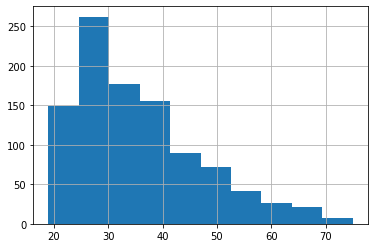

In [10]:
# What is the age distribution
print(German_df.Age.hist())

AxesSubplot(0.125,0.125;0.775x0.755)


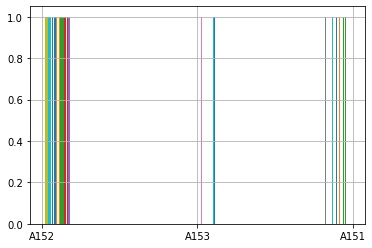

In [11]:
# What is the age distribution
print(German_df.Property.hist())

In [12]:
German_df[['Job']].describe()
print('Job Unique values', German_df.Job.unique())

Job Unique values ['A173' 'A172' 'A174' 'A171']


In [13]:
German_df[['Job']].describe()
print('Job Unique values', German_df.Job.unique())

Job Unique values ['A173' 'A172' 'A174' 'A171']


In [14]:
German_df[['CreditStatus']].describe()
print('Credit Status values', German_df.CreditStatus.unique())

Credit Status values [1 0]


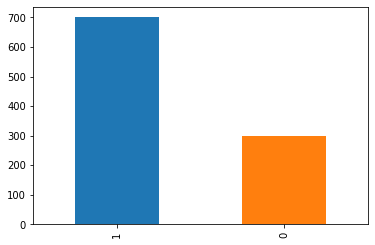

In [15]:
# What is the age distribution
German_df.CreditStatus.value_counts().plot(kind = 'bar')

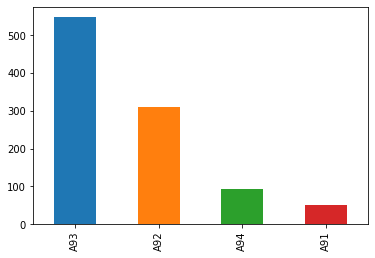

In [16]:
German_df.Gender.value_counts().plot(kind = 'bar')

In [17]:
#print('Before - German gender value counts', German_df.Gender.value_counts())
German_df['Gender'].replace('A91' ,1, inplace=True)
German_df['Gender'].replace('A92' ,0, inplace=True)
German_df['Gender'].replace('A93' ,1, inplace=True)
German_df['Gender'].replace('A94' ,1, inplace=True)
German_df['Gender'].replace('A95' ,0, inplace=True)
print ('Males = 1, Females = 0')
print(German_df.Gender.value_counts())

Males = 1, Females = 0
1    690
0    310
Name: Gender, dtype: int64


In [18]:
### get into the meat of whats what
gender = German_df.groupby(['Gender', 'CreditStatus']).size()
gender

Gender  CreditStatus
0       0               109
        1               201
1       0               191
        1               499
dtype: int64

In [19]:
### get into the meat of whats what
print('Good Credit Status = 1, Bad Credit Status = 0')
marrstatus = German_df.groupby(['MaritalStatus', 'CreditStatus']).size()
marrstatus

Good Credit Status = 1, Bad Credit Status = 0


MaritalStatus    CreditStatus
Man Was Married  0                20
                 1                30
Married Man      0                25
                 1                67
Single Male      0               146
                 1               402
Women With Man   0               109
                 1               201
dtype: int64

In [20]:
#Make foreign worker status Foreign worker = 0, German worker = 1
German_df['ForeignWorker'].replace('A201' ,0, inplace=True)
German_df['ForeignWorker'].replace('A202' ,1, inplace=True)

In [21]:
### get into the meat of whats what
print('Foreign Worker = 0, German Worker = 1')
print('Good Credit Status = 1, Bad Credit Status = 0')
workerstatus = German_df.groupby(['ForeignWorker', 'CreditStatus']).size()
workerstatus

Foreign Worker = 0, German Worker = 1
Good Credit Status = 1, Bad Credit Status = 0


ForeignWorker  CreditStatus
0              0               296
               1               667
1              0                 4
               1                33
dtype: int64